## Лабораторная работа 8

## Задача XI.9.2


$$
y'' + pxcos(y) = 0, \: x\in \left[ 0, 1 \right] 
$$
$$
y'(0) = 0, y(1) = 0, p = 1, 4, 7, 25, 50, 100
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Метод стрельбы

In [2]:
def regulate_size(new_size, y1_0 =0, y2_0 =0):
    time_array = [0] * new_size
    for i in range(new_size):
        time_array[i] = h * i

    y1 = [0] * size
    y1[0] = y1_0

    y2 = [0] * size
    y2[0] = y2_0
    
    return time_array, y1, y2

In [3]:
# Components of function f

def f_1(t, y1, y2):
    return - p * t * math.cos(y2)

def f_2(t, y1, y2):
    return y1

In [4]:
def norm(x, y):
    return math.sqrt(x ** 2 + y ** 2)

def prediction(t, y1, y2, f_1, f_2, h):
    y1_next_it = y1 + h * f_1(t, y1, y2)
    y2_next_it = y2 + h * f_2(t, y1, y2)
    return y1_next_it, y2_next_it

def correction(t, y1, y2, t_next, y1_next_it, y2_next_it, f_1, f_2, h):
    y1_next = y1 + h * (f_1(t, y1, y2) + f_1(t_next, y1_next_it, y2_next_it)) / 2
    y2_next = y2 + h * (f_2(t, y1, y2) + f_2(t_next, y1_next_it, y2_next_it)) / 2
    return y1_next, y2_next


def find_next_step(t, y1, y2, t_next, f_1, f_2, h, accuracy):
    y1_next_it, y2_next_it = prediction(t, y1, y2, f_1, f_2, h)
    
    y1_next, y2_next = correction(t, y1, y2, t_next, y1_next_it, y2_next_it, f_1, f_2, h)
    while norm(y1_next - y1_next_it, y2_next - y2_next_it) > accuracy:
        y1_next_it = y1_next
        y2_next_it = y2_next
        y1_next, y2_next = correction(t, y1, y2, t_next, y1_next_it, y2_next_it, f_1, f_2, h)
    
    return y1_next, y2_next

In [5]:
def find_solution(x, z, y, z_0, y_target_right_border, accuracy):
    z[0] = z_0  # y'(0)
    
    # A0 = 0, solve system and find B0
    y_left_border_1 = 0
    y_left_border_2 = 0
    y[0] = y_left_border_1
    for i in range(size - 1):
        z[i + 1], y[i + 1] = find_next_step(x[i], z[i], y[i], x[i + 1], f_1, f_2, h, 0.001)
    y_right_border_1 = y[-1]
    
    # Search for A1 satisfying the condition
    y_right_border_2 = y_right_border_1
    j = 1
    while np.sign(y_right_border_1 - y_target_right_border) == np.sign(y_right_border_2 - y_target_right_border):
        y_left_border_2 = j
        y[0] = y_left_border_2
        for i in range(size - 1):
            z[i + 1], y[i + 1] = find_next_step(x[i], z[i], y[i], x[i + 1], f_1, f_2, h, 0.001)
        y_right_border_2 = y[-1]
        j += 1
    
    # initial value in order to enter in the cycle
    new_y_right_border = y_target_right_border + accuracy * 2
    
    # Search by dichotomy method
    while abs(new_y_right_border - y_target_right_border) > accuracy:
        new_y_left_border = (y_left_border_1 + y_left_border_2) / 2
        y[0] = new_y_left_border
        for i in range(size - 1):
            z[i + 1], y[i + 1] = find_next_step(x[i], z[i], y[i], x[i + 1], f_1, f_2, h, 0.001)
        new_y_right_border = y[-1]
        if np.sign(new_y_right_border) != np.sign(y_right_border_1):
            y_left_border_2 = new_y_left_border
        else:
            y_left_border_1 = new_y_left_border

Заполним значения параметра p, точность искомого решения, зададим границы интервала для решения и создадим массивы (z = y'):

In [6]:
p_arr = [1, 4, 7, 25, 50, 100, 200, 500] # more parameter values are used in order to get different pictures on the graph
max_x = 1    # 1 second
accuracy = 0.001

In [7]:
h = 0.0001
size = int(max_x / h + 1)
x, z, y = regulate_size(size)
z_0 = 0

Ищем решение для каждого параметра p из набора:

p =  1


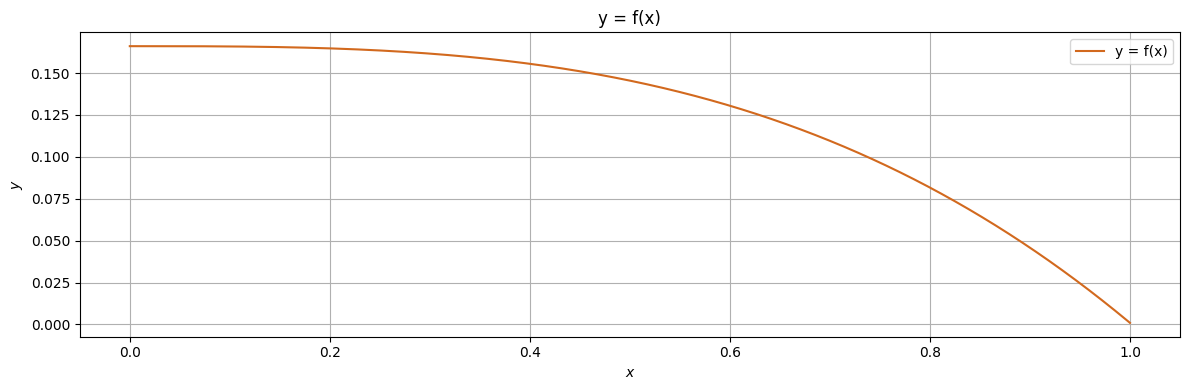

y[1] =  0.0009199667874342723
-----------------------------------------------------------------------------------------------------
p =  4


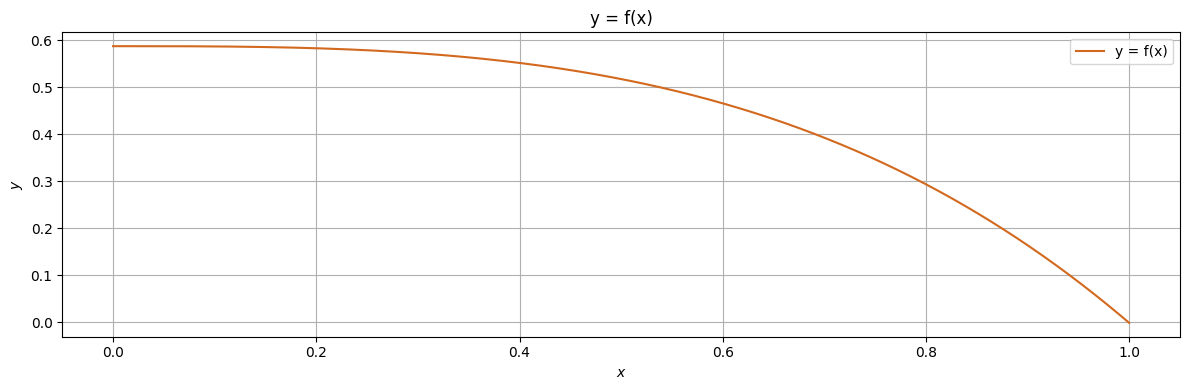

y[1] =  -0.000925264115365438
-----------------------------------------------------------------------------------------------------
p =  7


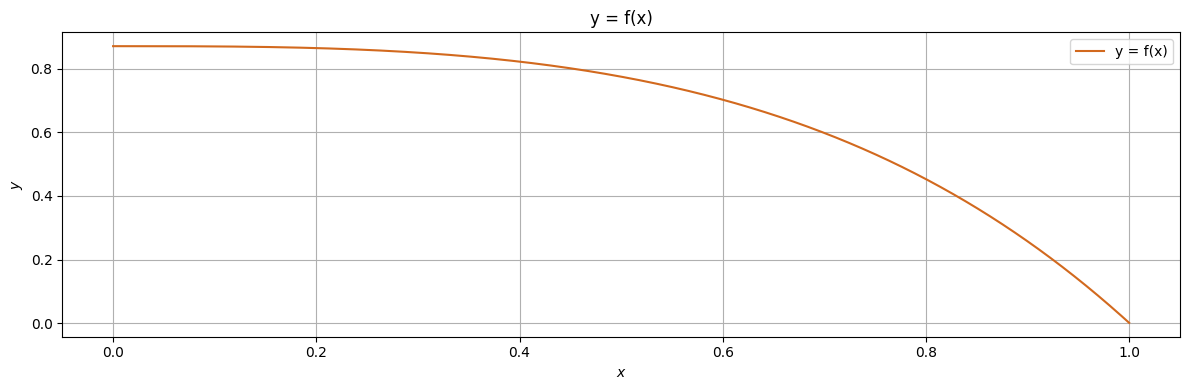

y[1] =  0.0006307702865452792
-----------------------------------------------------------------------------------------------------
p =  25


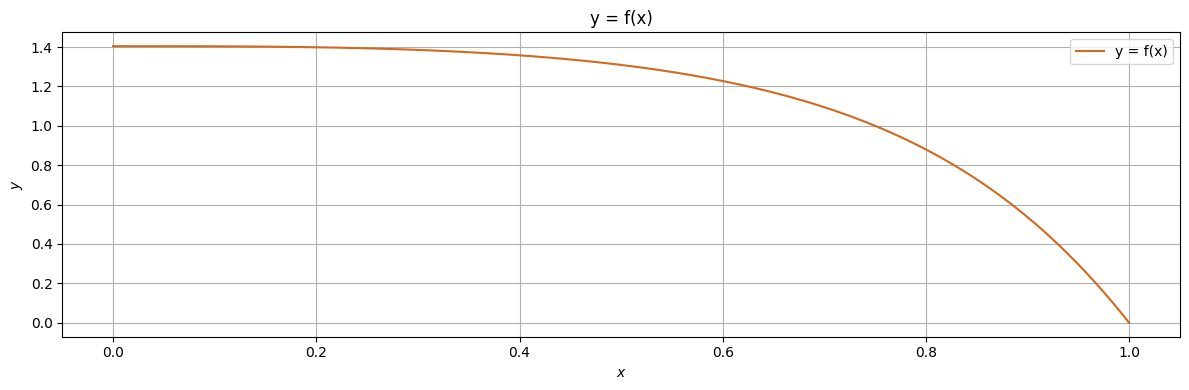

y[1] =  -0.0007490194652986878
-----------------------------------------------------------------------------------------------------
p =  50


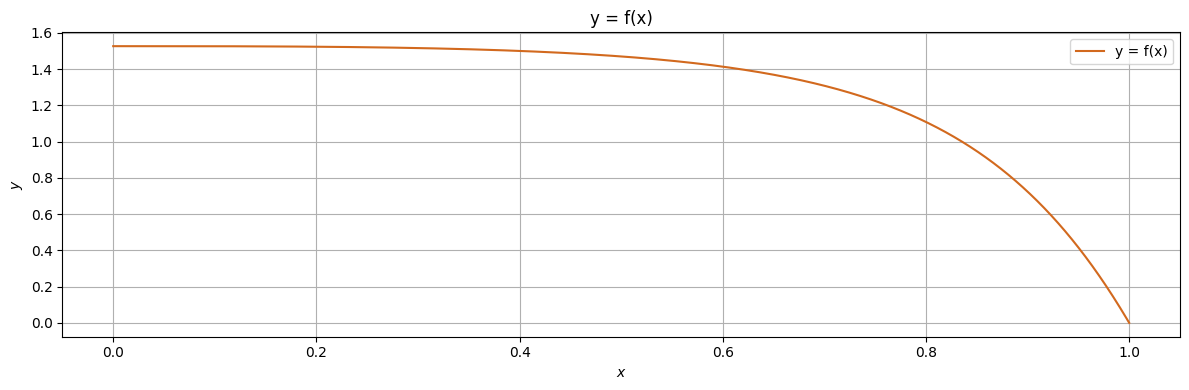

y[1] =  -0.0007866803203721711
-----------------------------------------------------------------------------------------------------
p =  100


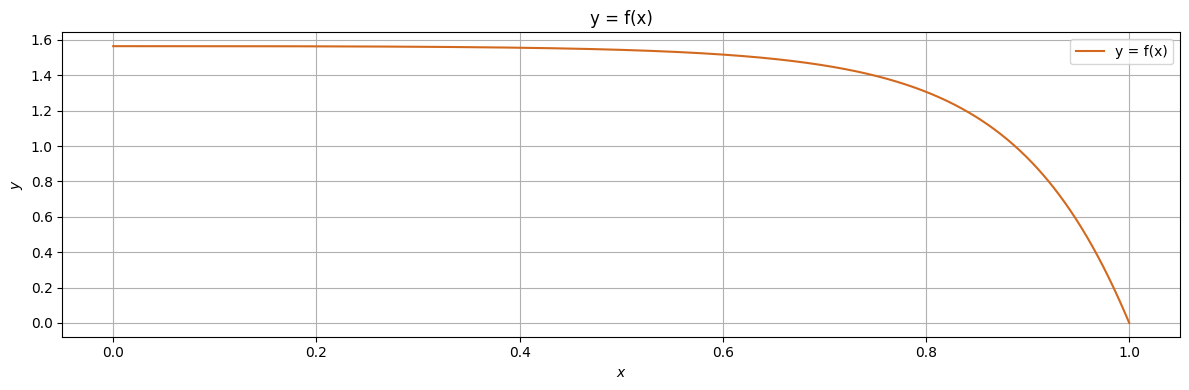

y[1] =  0.0005226776834937172
-----------------------------------------------------------------------------------------------------
p =  200


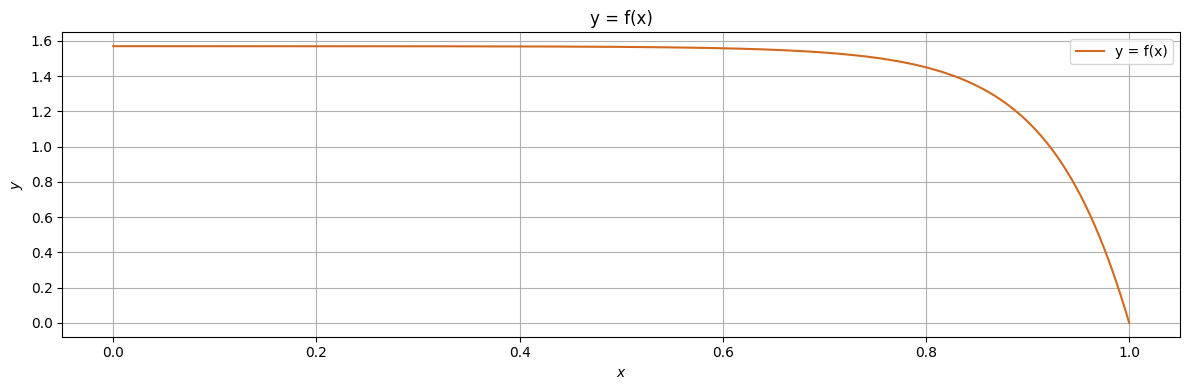

y[1] =  7.482260898149457e-05
-----------------------------------------------------------------------------------------------------
p =  500


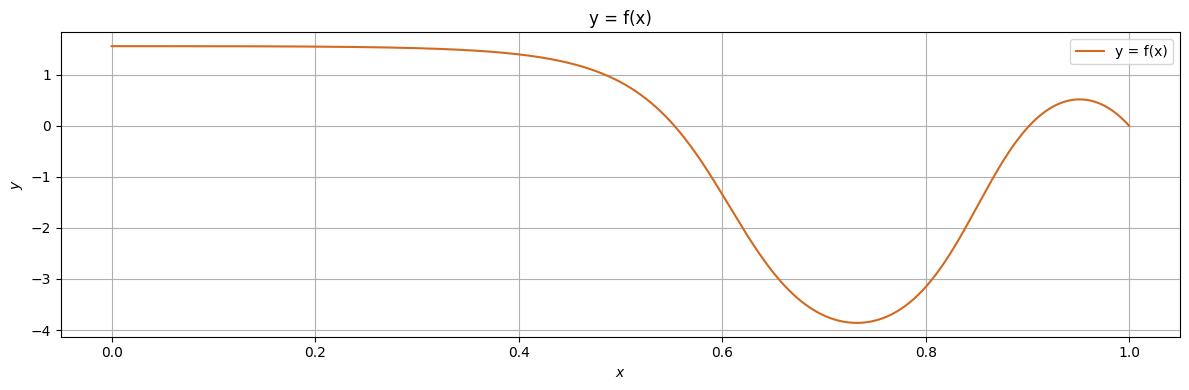

y[1] =  0.0003527538369471816
-----------------------------------------------------------------------------------------------------


In [14]:
for p in p_arr:
    print("p = ", p)

    find_solution(x, z, y, z_0, 0, accuracy)  # y(1) = 0, accuracy = 0.001
    
    # y = f(x)
    plt.figure(figsize=[12, 4])
    plt.plot(x, y, label='y = f(x)', c='chocolate')

    plt.title("y = f(x)")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

    print("y[1] = ", y[-1])
    print("-----------------------------------------------------------------------------------------------------")

## Задача XI.9.5

Для численного отыскания периодического с периодом $1$ решения уравнения
$$
y'' - P^2(x)y = f(x), \: x\in \left[ 0, 1 \right]
$$
где
$$
P^2(x) =  10 + \sin{2\pi x}, \:\:\:
f(x) = \cos{2\pi x}, \:\:\:
h = 0.005, \: \: Nh = 1
$$
используется разностная схема
$$
\left\lbrace
\begin{matrix}
\dfrac{y_1 - 2y_0 + y_{N-1}}{h^2} - P^2(0)y_0 &=& f(0)& \\
\dfrac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(nh)y_n &=& f(nh)&, \: n = 1,2, \dots, N-2 \\
\dfrac{y_0 - 2y_{N-1} + y_{N-2}}{h^2} - P^2(1-h)y_{N-1} &=& f(1-h)& \\
\end{matrix}
\right.
$$
где $y_0 = y_N$


Функция прогонки - принимает матрицу и столбец, выполняет прогонку и возваращет массив решений

In [ ]:
def prog(m, ph):
  # forward
  a = m[0][-1]
  b = -m[0][0]
  c = m[0][1]

  alpha = [c / b]
  beta = [-ph[0] / b]
  gamma = [a / b]

  for i in range(1, len(ph) - 1):
    c = m[i][i + 1]
    b = -m[i][i]
    a = m[i][i - 1]

    den = b - alpha[-1] * a

    alpha.append(c / den)
    beta.append((a * beta[-1] - ph[i]) / den)
    gamma.append(a * gamma[-1] / den)

  # backward
  den_mu = m[-1][-2] * (alpha[-1] + gamma[-1]) + m[-1][-1]
  mu = [-m[-1][0] / den_mu]
  nu = [(ph[-1] - m[-1][-2] * beta[-1]) / den_mu]

  for i in reversed(range(0, len(ph) - 1)):
    mu.append(alpha[i] * mu[-1] + gamma[i] * mu[0])
    nu.append(beta[i] + alpha[i] * nu[-1] + gamma[i] * nu[0])

  mu.reverse()
  nu.reverse()
  y_0 = nu[0] / (1 - mu[0])
  y = [mu[-1] * y_0 + nu[-1]]

  # last
  for i in reversed(range(1, len(ph) - 1)):
    y.append(alpha[i] * y[-1] + beta[i] + gamma[i] * y[0])

  y.append(y_0)
  y.reverse()
  return np.array(y)

Вычисление + сравнение результата с numpy

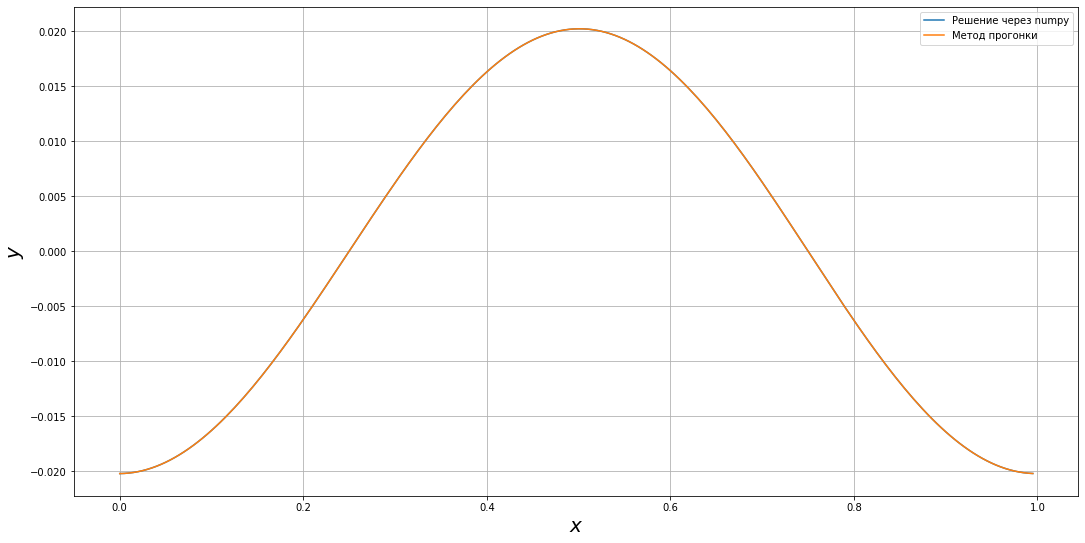

In [ ]:
h = 0.005
N =  int(1 / h)
x = np.array([k * h for k in range(N)])
bs = -(2 + h**2 * (10 + np.sin(2 * np.pi * x)))
phi_col = h**2 * np.cos(2 * np.pi * x)  

mat = np.diag(bs) + np.diag(np.ones(N - 1), 1) + np.diag(np.ones(N - 1), -1)
mat[0][-1] = mat[-1][0] = 1

y = np.linalg.solve(mat, phi_col)
my_y = prog(mat, phi_col)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label="Решение через numpy")
plt.plot(x, my_y, label="Метод прогонки")
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.grid()
plt.legend()

Оценка разницы с numpy

In [ ]:
print(f"Отличие решений: {np.mean(abs(y - my_y))}")

Отличие решений: 2.0722759827975652e-16
